### Vectors

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')
iris['spc'] = iris.species.factorize()[0]
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,spc
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0


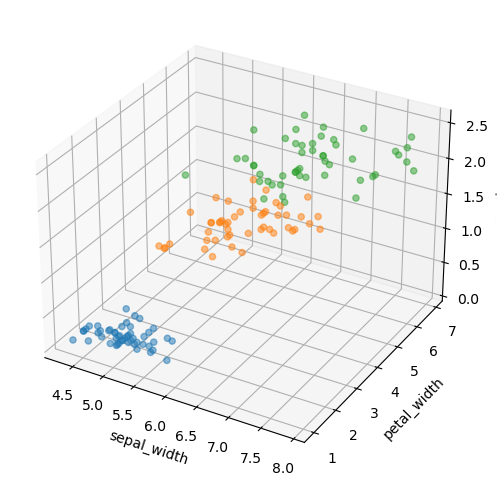

In [3]:
# 3D scatter plot
fig = plt.figure(figsize = (6, 6))
axs = fig.add_subplot(projection = '3d')
# use colors to indicate class label (get colormap from seaborn)
cmap = ListedColormap(sns.color_palette().as_hex()[:3])
# plot sepal_length, petal_length, petal_width (columns 1, 3, 4)
s3d = axs.scatter(iris.sepal_length, iris.petal_length, iris.petal_width, c = iris.spc, cmap = cmap, marker = 'o', s = 20, alpha = 0.5)
axs.set_xlabel(iris.columns[1])
axs.set_ylabel(iris.columns[3])
axs.set_zlabel(iris.columns[4]);

#### Vectors

- Each data point in the data space represents the *head* of a ***vector***.
- The coordinates of the datapoint are the ***components*** of the corresponding vector.

In [4]:
# components of the vector for observation number 10
v = iris.iloc[87]
v

sepal_length           6.3
sepal_width            2.3
petal_length           4.4
petal_width            1.3
species         versicolor
spc                      1
Name: 87, dtype: object

##### 2d-visualization

In [5]:
# 2D visualization of sepal-length and petal-width components of the vector
def plot_vector(v, axs):
    axs.scatter(v.sepal_length, v.petal_width, marker = 'o', s = 100, alpha = 0.7)
    # depict vector
    axs.arrow(0, 0, v.sepal_length, v.petal_width, head_width = 0.1)
    # depict first component (sepal length)
    axs.vlines(v.sepal_length, ymin = 0, ymax = v.petal_width, colors = 'red', linestyle = '--')
    axs.text(v.sepal_length /2, v.petal_width +0.1, str(v.sepal_length))
    # depict second component (petal_width)
    axs.hlines(v.petal_width, xmin = 0, xmax = v.sepal_length, colors = 'red', linestyle = '--')
    axs.text(v.sepal_length +0.1, v.petal_width /2, str(v.petal_width))

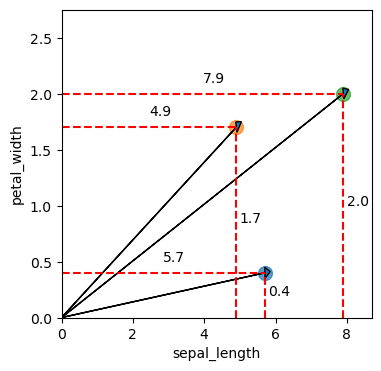

In [6]:
# 2D visualization of sepal-length and petal-width components of the vector
fig = plt.figure(figsize = (4, 4))
axs = fig.add_subplot()
# control axes
axs.set_xlim(0, iris.sepal_length.max() *1.1)
axs.set_ylim(0, iris.petal_width.max() *1.1)
axs.set_xlabel('sepal_length')
axs.set_ylabel('petal_width')
# plot vectors
for idx in [15, 106, 131]:
    plot_vector(iris.loc[idx], axs)

##### vector norm (L2)
- the norm of a vector is the *length* of the vector
- we compute it using the *Pithagorean* theorem: $c = \sqrt{a^2 +b^2}$
- for a vector with $m$ components: $|v| = \left(\sum_{j=1}^m\,v_j^2\right)^{1/2}$

In [7]:
# vector norm considering components sepal_length and petal_width (i.e. 2D-space)
np.sqrt(np.sum(v.sepal_length**2 +v.petal_width**2))

6.432728814430155

In [8]:
# norm of the 4d-vector (all 4 components)
np.array(v)

array([6.3, 2.3, 4.4, 1.3, 'versicolor', 1], dtype=object)

In [9]:
np.sqrt(np.sum(np.array(v[:-2])**2))

8.12588456723328

#### argument of a vector

- indicates the ***direction*** of the vector
- we express the direction of the vector as an angle with respect to the axes
- we compute it using the *arctan()* function: $\theta = \arctan{(b/a)}$

In [10]:
np.arctan(v.petal_width /v.sepal_length)

0.2034930452575628

##### 3d-visualization

In [11]:
components = [0, 1, 3]
iris.iloc[:, components].head(3)

,sepal_length,sepal_width,petal_width
0,5.1,3.5,0.2
1,4.9,3.0,0.2
2,4.7,3.2,0.2


In [12]:
v.iloc[components]

sepal_length    6.3
sepal_width     2.3
petal_width     1.3
Name: 87, dtype: object

In [13]:
def vector_3d(v, axs):
    axs.scatter(v[0], v[1], v[2], marker = 'o', s = 100, alpha = 0.7)
    # depict vector
    axs.plot([0, v[0]], [0, v[1]], [0, v[2]])
    # depict components
    axs.plot([v[0], v[0]], [v[1], v[1]], [0, v[2]], 'r--', linewidth = '0.5')
    axs.plot([v[0], v[0]], [0, v[1]], [0, 0], 'r--', linewidth = '0.5')
    axs.plot([0, v[0]], [v[1], v[1]], [0, 0], 'r--', linewidth = '0.5')

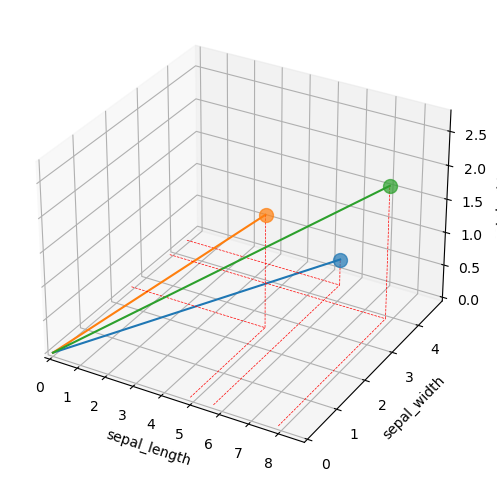

In [14]:
# 3D visualization
fig = plt.figure(figsize = (6, 6))
axs = fig.add_subplot(projection = '3d')
# axes range
axs.set_xlim(0, iris.iloc[:, components[0]].max() *1.1)
axs.set_ylim(0, iris.iloc[:, components[1]].max() *1.1)
axs.set_zlim(0, iris.iloc[:, components[2]].max() *1.1)
# axes labels
axs.set_xlabel(iris.columns[components[0]])
axs.set_ylabel(iris.columns[components[1]])
axs.set_zlabel(iris.columns[components[2]])
# plot vectors
for idx in [15, 106, 131]:
    vector_3d(iris.iloc[idx, components], axs)